In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Minahan, Miss. Daisy E",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


# 欠測値の確認

全データ数が891に対しての欠測値の数が、以下のようになっている。 
Ageが177でおよそ20%の欠測  
Cabinが687でおよそ77%の欠測  
Embarkedが2の欠測であった。  

Cabinは欠測率が高い　　＝＞削除した方がいいかも  
Ageは欠測率が小さい=>補完する  
Embarkedは欠測値が少ないので、補完する  

In [5]:
print("cout=", 891)
pd.isnull(train).sum()

cout= 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
687/891

0.7710437710437711

# データの種類

1. Survived:カテゴリデータ
2. Pclass:カテゴリデータ
3. Name:カテゴリデータ
4. Age:数値データ
5. SibSp:カテゴリデータ
6. Parch:カテゴリデータ
7. Ticket:カテゴリデータ
8. Fare:数値データ
9. Cabin:カテゴリデータ
10. Embarked:カテゴリデータ

In [7]:
p_id = train["PassengerId"]
train = train.drop(["PassengerId"], axis=1)

## Survived

生存フラグ  
0:死亡  
1:生存  

Number of Name unique: 3


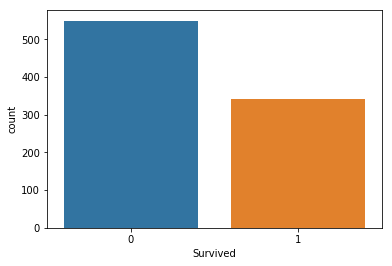

In [8]:
#train['Survived']
print('Number of Name unique:', train['Pclass'].nunique())
sns.countplot(x="Survived", data=train)

## Pclass

Ticket Class  
1:1st  
2:2nd  
3:3rd

unique_val: [3 1 2]
unique_val_counts
Number of Name unique: 3
3    491
1    216
2    184
Name: Pclass, dtype: int64


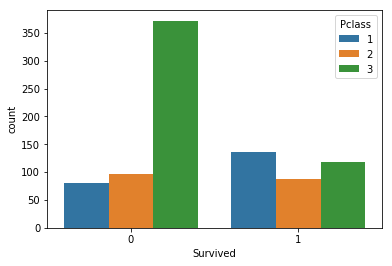

In [9]:
print('unique_val:', train['Pclass'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Pclass'].nunique())
print(train['Pclass'].value_counts())
sns.countplot(x="Survived", hue='Pclass', data=train)

In [10]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


## Name

固有名称が891と分類が難しい

In [11]:
print('Number of Name unique:', train['Name'].nunique())
print(train['Name'].value_counts())

Number of Name unique: 891
Minahan, Miss. Daisy E                                      1
Coelho, Mr. Domingos Fernandeo                              1
Kelly, Mrs. Florence "Fannie"                               1
Canavan, Miss. Mary                                         1
Slabenoff, Mr. Petco                                        1
Ivanoff, Mr. Kanio                                          1
Emir, Mr. Farred Chehab                                     1
Renouf, Mrs. Peter Henry (Lillian Jefferys)                 1
Perreault, Miss. Anne                                       1
Pears, Mrs. Thomas (Edith Wearne)                           1
Johnston, Miss. Catherine Helen "Carrie"                    1
Olsen, Mr. Karl Siegwart Andreas                            1
Matthews, Mr. William John                                  1
Attalah, Mr. Sleiman                                        1
Caldwell, Master. Alden Gates                               1
Ford, Miss. Doolina Margaret "Daisy"       

In [19]:
#train['Name'].apply(len)
#train['Cabin'].apply(lambda x:0 if type(x) == float else 1)

## name_length
## has_cabin
## familysize
## isalone
## Embarked fill mode value
## 

## Sex

female or male

unique_val: ['male' 'female']
Number of Name unique: 2
unique_val_counts
male      577
female    314
Name: Sex, dtype: int64


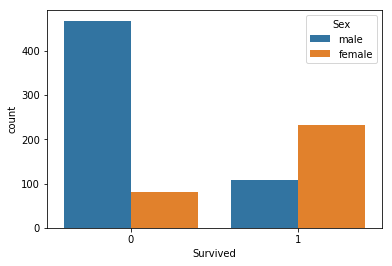

In [69]:
print('unique_val:', train['Sex'].unique())
print('Number of Name unique:', train['Sex'].nunique())
print('unique_val_counts')
print(train['Sex'].value_counts())

#0 is dead, 1is survival
sns.countplot(x="Survived", hue="Sex",data=train)

In [87]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.188908
1    1  0.742038


In [70]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

## Age

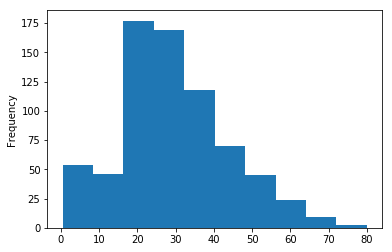

In [71]:
train['Age'].plot('hist')

## SibSp

兄弟・配偶者の人数

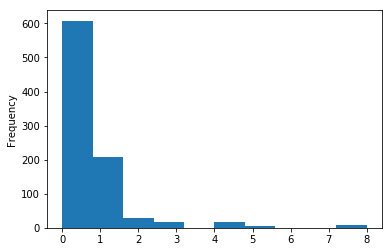

In [72]:
train["SibSp"].plot("hist")

unique_val: [1 0 3 4 2 5 8]
unique_val_counts
Number of Name unique: 7
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


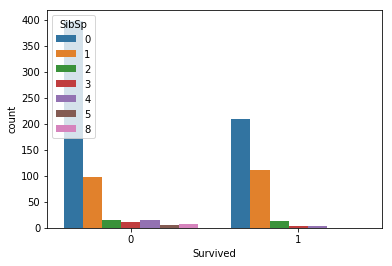

In [73]:
print('unique_val:', train['SibSp'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['SibSp'].nunique())
print(train['SibSp'].value_counts())
sns.countplot(x="Survived", hue='SibSp', data=train)

## Parch

親・子供の人数

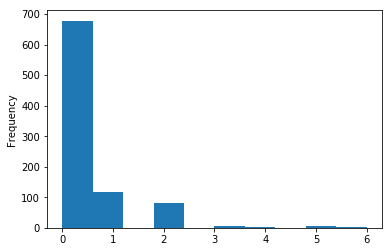

In [74]:
train["Parch"].plot('hist')

unique_val: [0 1 2 5 3 4 6]
unique_val_counts
Number of Name unique: 7
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


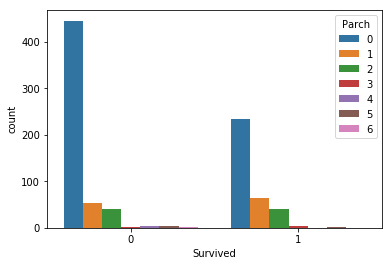

In [75]:
print('unique_val:', train['Parch'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Parch'].nunique())
print(train['Parch'].value_counts())
sns.countplot(x="Survived", hue='Parch', data=train)

## Ticket

Ticketの番号  

固有名称が、681と多い

In [76]:
#print('unique_val:', train['Ticket'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Ticket'].nunique())
print(train['Ticket'].value_counts());
#sns.countplot(x="Survived", hue='Ticket', data=train)

unique_val_counts
Number of Name unique: 681
1601            7
CA. 2343        7
347082          7
3101295         6
347088          6
CA 2144         6
382652          5
S.O.C. 14879    5
19950           4
347077          4
W./C. 6608      4
113781          4
PC 17757        4
LINE            4
4133            4
17421           4
113760          4
2666            4
349909          4
C.A. 34651      3
F.C.C. 13529    3
35273           3
239853          3
PC 17760        3
PC 17572        3
347742          3
110152          3
29106           3
C.A. 31921      3
24160           3
               ..
A/5. 10482      1
349201          1
7546            1
383121          1
14311           1
113787          1
315153          1
PC 17756        1
28425           1
113767          1
C.A. 29178      1
PC 17595        1
13214           1
3474            1
29104           1
W.E.P. 5734     1
239854          1
SO/C 14885      1
330923          1
19947           1
65306           1
28424           1
C

In [77]:
print(train[train['Ticket'] == 'CA. 2343']['Survived'].value_counts())
print(train[train['Ticket'] == '1601']['Survived'].value_counts())
print(train[train['Ticket'] == '347082']['Survived'].value_counts())
print(train[train['Ticket'] == 'CA 2144']['Survived'].value_counts())

0    7
Name: Survived, dtype: int64
1    5
0    2
Name: Survived, dtype: int64
0    7
Name: Survived, dtype: int64
0    6
Name: Survived, dtype: int64


## Fare

料金

unique_val_counts
Number of Name unique: 248
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64


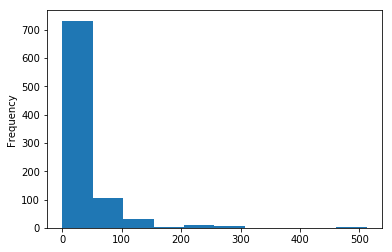

In [78]:
#print('unique_val:', train['Fare'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Fare'].nunique())
print(train['Fare'].value_counts().head())
train['Fare'].plot('hist')
plt.show()
#sns.countplot(x='Survived', hue='Fare', data=train)

## Cabin

Cabin number

In [79]:
#print('unique_val:', train['Cabin'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Cabin'].nunique())
print(train['Cabin'].value_counts().head(3))
#sns.countplot(x="Survived", hue='Cabin', data=train)

unique_val_counts
Number of Name unique: 147
G6             4
C23 C25 C27    4
B96 B98        4
Name: Cabin, dtype: int64


## Embarked 

出発した港  
C = Cherbourg  
Q = Queenstown  
S = Southampton  　

unique_val: ['S' 'C' 'Q' nan]
unique_val_counts
Number of Name unique: 3
S    644
C    168
Q     77
Name: Embarked, dtype: int64


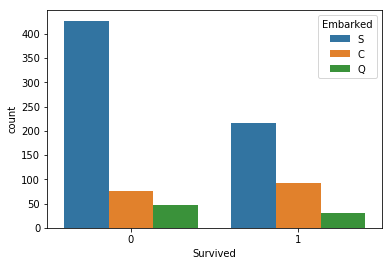

In [80]:
print('unique_val:', train['Embarked'].unique())
print('unique_val_counts')
print('Number of Name unique:', train['Embarked'].nunique())
print(train['Embarked'].value_counts().head(3))
sns.countplot(x="Survived", hue='Embarked', data=train)

## Pclass and Sex

Text(0.5,1,'Pclass=1 and Sex = female')

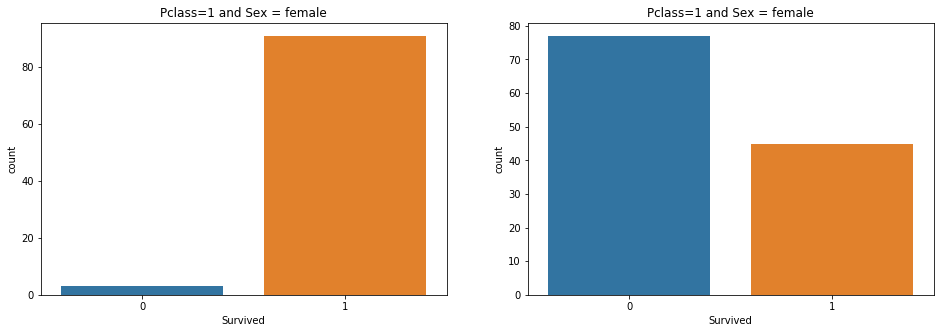

In [81]:
pclass_1 = train[train['Pclass'] == 1]
p1_f = pclass_1[pclass_1['Sex'] == 1]
p1_m = pclass_1[pclass_1['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p1_f)
plt.title('Pclass=1 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p1_m)
plt.title('Pclass=1 and Sex = female')

Text(0.5,1,'Pclass=2 and Sex = female')

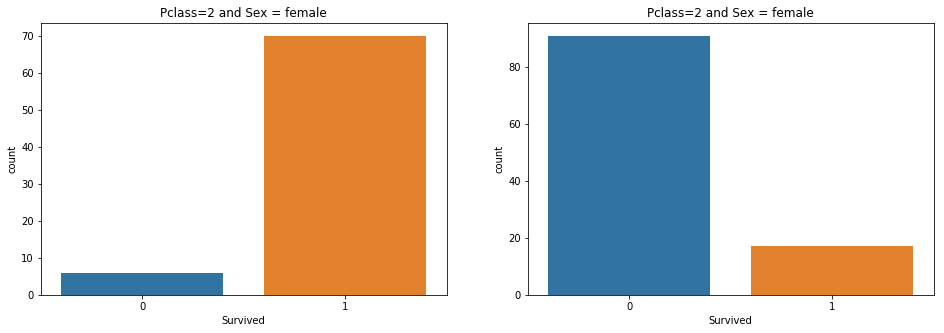

In [82]:
pclass_2 = train[train['Pclass'] == 2]
p2_f = pclass_2[pclass_2['Sex'] == 1]
p2_m = pclass_2[pclass_2['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p2_f)
plt.title('Pclass=2 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p2_m)
plt.title('Pclass=2 and Sex = female')

Text(0.5,1,'Pclass=3 and Sex = male')

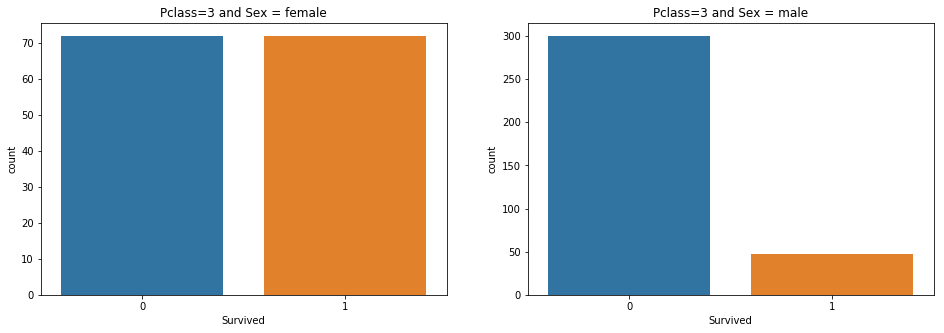

In [83]:
pclass_3 = train[train['Pclass'] == 3]
p3_f = pclass_3[pclass_3['Sex'] == 1]
p3_m = pclass_3[pclass_3['Sex'] == 0]

fig, ax = plt.subplots(figsize=(16, 5))
plt.subplot(1, 2, 1)
g = sns.countplot(x='Survived', data=p3_f)
plt.title('Pclass=3 and Sex = female')
plt.subplot(1, 2, 2)
g = sns.countplot(x='Survived', data=p3_m)
plt.title('Pclass=3 and Sex = male')

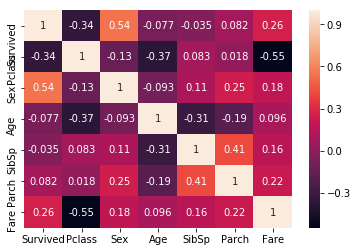

In [84]:
sns.heatmap(train.corr(),annot=True)

ValueError: max must be larger than min in range parameter.

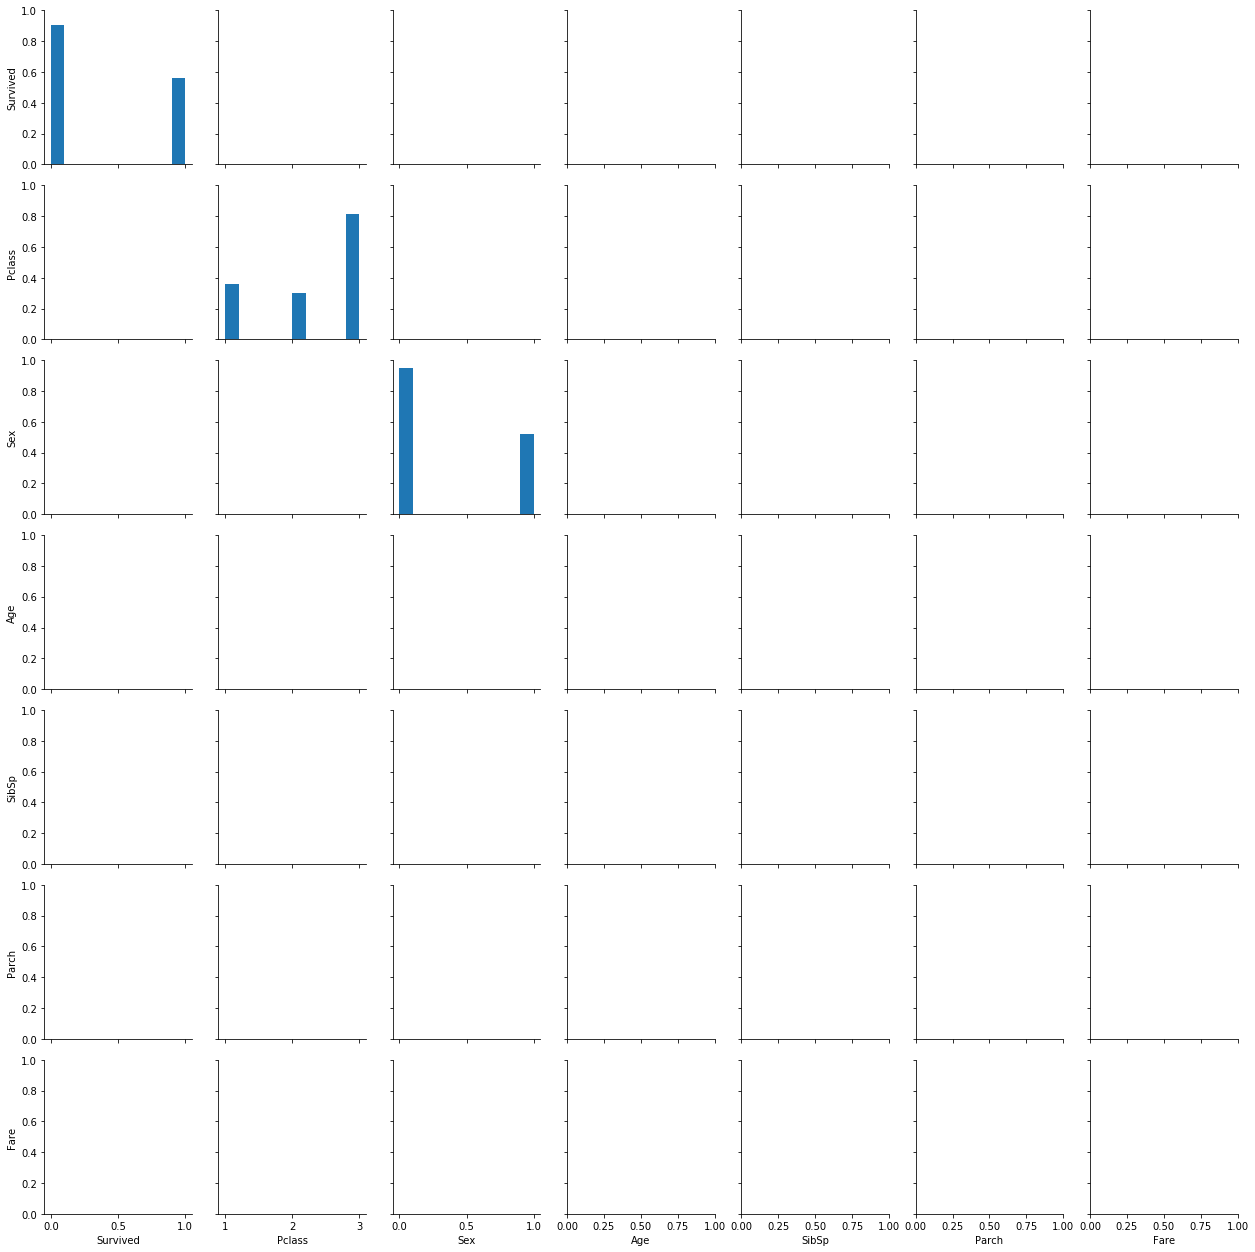

In [88]:
sns.pairplot(train)

# 欠測値の補完
## Embarkedの補完

a = train['Embarked'].fillna('S')  
b = train.drop(['Embarked'], axis=1)  
train = pd.concat([b,a], axis=1)  
train.isnull().sum()  

In [89]:
train['Embarked'] = train['Embarked'].fillna('S')

In [90]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [91]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

## Ageの欠測を補完

In [93]:
Age_drop_col = ['Survived', 'Age', 'Name', 'Ticket', 'Cabin']
isn = train[train['Age'].isnull()]
non = train[train['Age'].notnull()]
isn_Age_y = isn['Age'] 
non_Age_y = non['Age']

isn_Age_X = isn.drop(Age_drop_col, axis=1)
non_Age_X = non.drop(Age_drop_col, axis=1)

In [94]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(non_Age_X, non_Age_y)

a = lin_reg.predict(isn_Age_X)

In [104]:
a = a.astype(int)
b = []
for i in a:
    if(i<0):
        i = 0
    b.append(i)
b=np.array(b)

In [105]:
b

array([27, 35, 24, 28, 24, 28, 32, 24, 28, 28, 28, 23, 24, 20, 41, 41, 23,
       28, 28, 24, 28, 28, 28, 28, 20, 28, 27, 19, 23, 28, 28,  0, 37, 42,
       15,  0, 34, 41, 20, 27, 24,  0, 23, 28, 12, 25, 20, 20, 28, 37, 27,
       24, 41, 24, 35, 42, 41, 41, 24, 19, 31, 28, 37,  0, 16, 33, 28, 21,
       41, 28, 24, 24, 23, 24, 24, 33, 28, 27, 12, 28, 27, 35, 25, 28, 28,
       27, 21, 28, 24, 28, 34, 27, 28, 35, 27, 28, 41, 35, 12, 24, 27, 28,
       24, 42, 28, 27, 28, 28, 38, 28, 23, 28, 34, 27, 38, 27, 28, 25, 28,
       24, 20, 28, 28, 22, 31, 28, 28, 41, 28, 20, 27, 27, 42, 24, 27, 28,
       28, 24, 28, 28, 34, 35, 24, 27, 24, 23, 42, 27, 24, 35, 28, 28, 41,
       28, 41, 23, 28, 27, 27, 22, 27,  0, 41, 42, 27, 27, 27, 28, 28, 41,
        0, 33, 28,  0, 28, 28, 19])

## データ整形

In [271]:
drop_col = ['Survived', 'Name', 'Ticket', 'Cabin', 'Age']
y = train['Survived']
X = train.drop(drop_col, axis=1)

# モデル

In [274]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [284]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

77.09


In [285]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


64.25


In [286]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

74.86


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [287]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.65


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Generating Base First-Level Model

## 1. Random Forest Classifier
## 2. Extra Trees Classifier
## 3. AdaBoost Classifier
## 4. Gradient Boosting Classifier
## 5. Support Vector Machine